# VaR Analysis Monte Carlo Method

This is a Value at Risk analysis Monte Carlo Method to determine the possible amount of money you could lose if you invest in the companies below

## Importing necessary libraries

In [60]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

## Importing our data

In [6]:
df = pd.read_excel('PH stocks.xlsx', index_col = False)
df = df.set_index('Date')
df = df.dropna()
df.head()

,BDO,EW,MBT,PNB,SECB,UBP
Date,,,,,,
43742,143.5,11.82,68.0,43.50,197.9,59.05
43745,140.0,11.70,68.0,44.00,197.0,59.10
43746,143.0,11.72,67.3,43.05,194.6,59.05
43747,143.4,11.62,66.0,42.95,191.0,59.00
43748,145.0,11.78,67.8,43.50,199.0,59.00


## Calculating log returns

In [8]:
log_returns = np.log(df/df.shift(1))
log_returns = log_returns.dropna()
log_returns.head()

,BDO,EW,MBT,PNB,SECB,UBP
Date,,,,,,
43745,-0.024693,-0.010204,0.000000,0.011429,-0.004558,0.000846
43746,0.021202,0.001708,-0.010347,-0.021827,-0.012258,-0.000846
43747,0.002793,-0.008569,-0.019505,-0.002326,-0.018673,-0.000847
43748,0.011096,0.013675,0.026907,0.012724,0.041031,0.000000
43749,0.013699,0.021831,0.002946,-0.015055,-0.005038,0.000000


## Setting up the functions to be used later

In [75]:
# Create a function to calculate expected_returns using historical data
def expected_returns(weights, log_returns):
    return np.sum(log_returns.mean() * weights)

# Create a function to calculate standard deviation
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

## Creating a covariance matrix

In [77]:
cov_matrix = log_returns.cov()
cov_matrix

,BDO,EW,MBT,PNB,SECB,UBP
BDO,0.000545,0.000150,0.000203,0.000124,0.000180,0.000052
EW,0.000150,0.000288,0.000129,0.000103,0.000143,0.000028
MBT,0.000203,0.000129,0.000413,0.000096,0.000158,0.000044
PNB,0.000124,0.000103,0.000096,0.000357,0.000099,0.000026
SECB,0.000180,0.000143,0.000158,0.000099,0.000414,0.000056
UBP,0.000052,0.000028,0.000044,0.000026,0.000056,0.000381


## Setting up the weights and using the functions we made earlier

In [79]:
# Creating an equally weighted portfolio

stocks = df.columns
portfolio_value = 1000000
weights = np.array([1/len(stocks)]*len(stocks))

# Using the functions
portfolio_expected_return = expected_returns(weights, log_returns)
portfolio_std_deviation = standard_deviation(weights, cov_matrix)

## Create a function that generates a random Z-score based on a normal distribution

In [81]:
def rand_zscore():
    return np.random.normal(0,1)

## Create a function to calculate scenario gain loss

In [103]:
days = 5

def scenario_gain_loss(portfolio_value, portfolio_std_deviation, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_deviation * z_score * np.sqrt(days)

## It's Monte Carlo time

In [222]:
simulations = 10000
scenarioReturn = []

for x in range(simulations):
    z_score = rand_zscore()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_deviation, z_score, days))

## Calculating our VaR

In [225]:
confidence_interval = 0.95
VaR = -np.percentile(scenarioReturn, 100*(1-confidence_interval))

VaR

46434.00982524852

## Plotting our 10,000 simulations

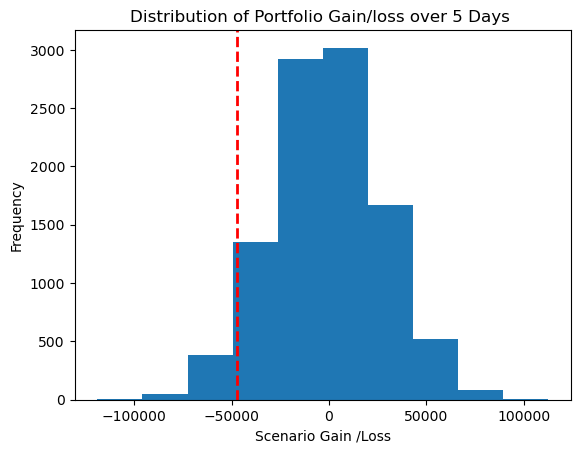

In [216]:
plt.hist(scenarioReturn)
plt.xlabel('Scenario Gain /Loss')
plt.ylabel('Frequency')
plt.title(f"Distribution of Portfolio Gain/loss over {days} Days ")
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth = 2, label= f'VaR at {confidence_interval:.0%} confidence level') 
plt.show()

## Conclusion

We managed to calculate our VaR using Monte Carlo method. The results show that in 5 days with 95% confidence interval, the maximum possible loss is ₱46,000-₱47,500. We can then use this information as a decision factor when creating portfolios. 